In [11]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.signal import butter, filtfilt

In [12]:
def load_data(filename):
    """
    Load data from a .mat file.
    """
    data = loadmat(filename)

    return data['lsl_data'][:,:-1], data['marker_data'].reshape(-1,4)

In [13]:
def highpass_filter(data, cutoff, fs):
    b, a = butter(2, cutoff / (0.5 * fs), btype='highpass')
    return filtfilt(b, a, data)

def bandstop_filter(data, lowcut,highcut, fs=1000):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(2, [low, high], btype='bandstop')
    return filtfilt(b, a, data)

In [14]:
def filter_channels(data, fs):
    ret = []
    for d in data.T:
        d = highpass_filter(d, 20, fs)
        d = bandstop_filter(d, 58,62, fs)
        d = bandstop_filter(d, 118,122, fs)
        d = bandstop_filter(d, 178,182, fs)
        ret.append(d)
    
    return ret


In [15]:
def bandpassFilter(data, sr, lowcut, highcut):
    ret = []
    nyq = 0.5 * sr
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(5, [low, high], btype='band')
    for d in data.T:
        ret.append(filtfilt(b, a, d))
    return ret

In [16]:
def filter_data(raw_data, marker_data,fs):
    cleaned_data = []
    labels = []
    for start, label, end, isbad in marker_data:
        if abs(isbad-99) < 1e-3:
            continue
        cleaned_data.append([])
        mask = (raw_data[:, 0] >= start) & (raw_data[:, 0] <= end)
        filtered_data = raw_data[mask][:1400]
        filtered_data = filter_channels(filtered_data, fs)
        cleaned_data[-1].extend(filtered_data)
        labels.append(label)
    return np.array(cleaned_data), labels

In [17]:
all_data = []
all_labels = []
for filename in os.listdir('raw_data'):
    if filename.endswith('.mat'):
        print(filename)
        raw_data, marker_data = load_data('raw_data/' + filename)
        cleaned_data, labels = filter_data(raw_data, marker_data,1000)
        all_data.append(cleaned_data)
        all_labels += labels
all_labels = np.array(all_labels)
all_data = np.concatenate(all_data)

lsl_data_2023-11-07-22-28-00.mat
lsl_data_2023-11-06-23-14-02.mat
lsl_data_2023-11-07-22-24-04.mat
lsl_data_2023-11-05-16-23-27.mat
lsl_data_2023-11-06-22-17-31.mat
lsl_data_2023-11-06-12-41-38.mat
lsl_data_2023-11-05-15-48-33.mat
lsl_data_2023-11-08-17-26-14.mat
lsl_data_2023-11-06-12-38-26.mat
dataset12RPC.mat
lsl_data_2023-11-06-22-53-24.mat
lsl_data_2023-11-07-22-35-15.mat
lsl_data_2023-11-08-17-38-34.mat
lsl_data_2023-11-06-12-25-23.mat
lsl_data_2023-11-07-22-10-16.mat
lsl_data_2023-11-05-16-27-54.mat
lsl_data_2023-11-06-12-18-52.mat
lsl_data_2023-11-06-12-44-41.mat
lsl_data_2023-11-06-12-00-53.mat
lsl_data_2023-11-05-15-38-47.mat
lsl_data_2023-11-06-12-21-59.mat
lsl_data_2023-11-05-16-37-53.mat
lsl_data_2023-11-07-22-18-42.mat
lsl_data_2023-11-08-17-10-11.mat
dataset13RPC.mat
lsl_data_2023-11-06-12-28-45.mat
dataset20RPC.mat
dataset16RPC.mat
dataset17RPC.mat
lsl_data_2023-11-07-22-53-49.mat
lsl_data_2023-11-07-22-45-39.mat
dataset14RPC.mat
lsl_data_2023-11-08-16-59-39.mat
lsl_dat

In [18]:
np.save( 'processed_data/all_data.npy', all_data)
np.save('processed_data/all_labels.npy', all_labels)

In [19]:
all_data[0][0]

array([ 1.44085650e-06, -4.05825316e-04, -3.85310221e-04, ...,
       -8.72707529e-06, -1.26063460e-04, -1.88001325e-04])

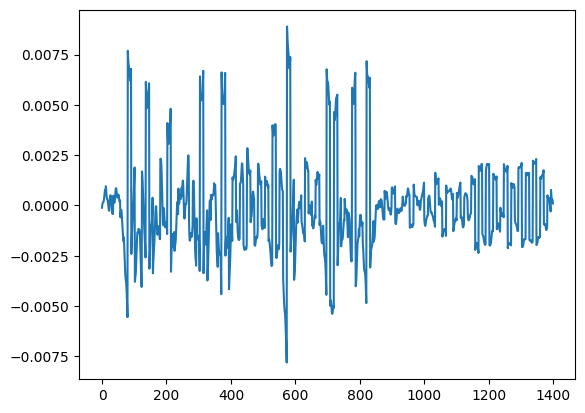

In [20]:
import matplotlib.pyplot as plt
plt.plot(all_data[64][0])
